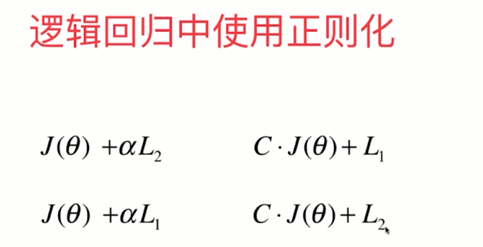

1、在损失函数前加上C值，调节函数进行正则化
2、在使用逻辑回归、SVM等分类算法时，最好要进行正则化操作

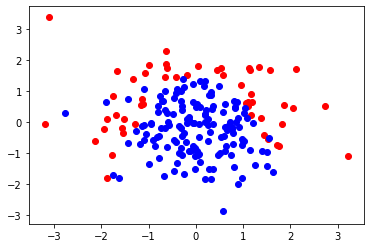

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:,1] < 1.5, dtype="int")

## 添加噪音
for _ in range(20):
    y[np.random.randint(200)] = 1
plt.scatter(X[y==0,0], X[y==0,1],color="red")
plt.scatter(X[y==1,0], X[y==1,1],color="blue")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.7933333333333333
0.86


In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_region(X, y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == c1, 0],
            y=X[y == c1, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=c1,
            edgecolors="black"
        )

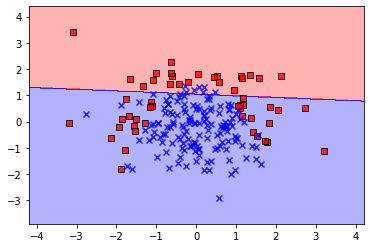

In [16]:
plot_decision_region(X, y, log_reg)


# 使用多项式项进行逻辑回归

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("ploy", PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("log_reg",LogisticRegression())
    ])

In [18]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('ploy',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [19]:
poly_log_reg.score(X_train, y_train)

0.9133333333333333

In [20]:
poly_log_reg.score(X_test, y_test)

0.94

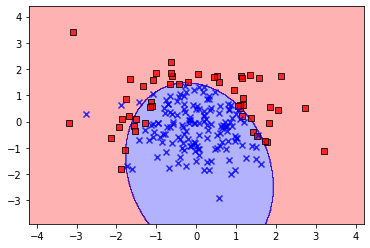

In [21]:
plot_decision_region(X, y, poly_log_reg)

In [24]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('ploy',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [25]:
poly_log_reg2.score(X_train, y_train)

0.94

In [26]:
poly_log_reg2.score(X_test, y_test)

0.92

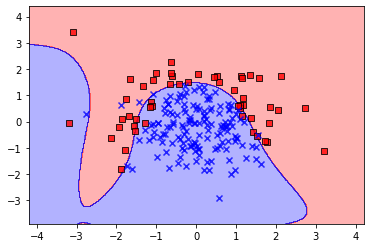

In [27]:
plot_decision_region(X, y, poly_log_reg2)

# 利用C值进行模型正则化

sklearn中默认使用的正则项为L2正则项

In [29]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ("ploy", PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("log_reg",LogisticRegression(C=C))
    ])

In [30]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg3.fit(X_train, y_train)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('ploy',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [31]:
poly_log_reg3.score(X_train, y_train)

0.8533333333333334

In [32]:
poly_log_reg3.score(X_test, y_test)

0.92

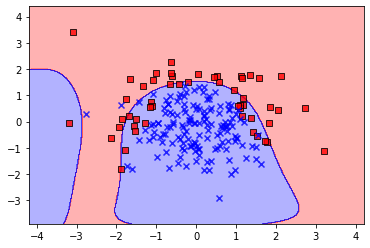

In [33]:
plot_decision_region(X, y, poly_log_reg3)

# 使用L1正则项

In [34]:
def PolynomialLogisticRegression(degree, C, penalty="l2"):
    return Pipeline([
        ("ploy", PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("log_reg",LogisticRegression(C=C, penalty=penalty))
    ])

In [35]:
poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty="l1")
poly_log_reg4.fit(X_train, y_train)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('ploy',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [36]:
poly_log_reg4.score(X_train, y_train)

0.8266666666666667

In [37]:
poly_log_reg4.score(X_test, y_test)

0.9

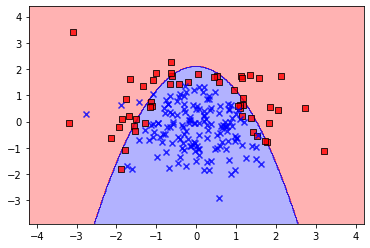

In [38]:
plot_decision_region(X, y, poly_log_reg4)